### Time series data are observations that are gathered one after the other over an extended period of time. Stationarity is a key presumption for many time series analysis methods. Modeling and analyzing a stationary time series is made easier by its stable statistical qualities over time. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [118]:
merged_data=pd.read_csv('merged_data')

In [121]:
merged_data.columns

Index(['Unnamed: 0', 'CALENDAR_DT', 'STD_SALES', 'DIG_SALES', 'TOTAL_SALES',
       'Demons Souls: (United States)',
       'playstation 5 buy online: (United States)',
       'ps5 buy online: (United States)',
       'sony ps5 buy online: (United States)',
       'Destruction AllStars: (United States)', 'Returnal: (United States)',
       'Ratchet & Clank: Rift Apart: (United States)',
       'Forspoken: (United States)', 'TOTAL_SALES_MA', 'PlayStation_MA',
       'TOTAL_SALES_SCALED', 'ps_5_MA', 'Forspoken_MA', 'Ratchet_MA'],
      dtype='object')

In [122]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    32 non-null     int64  
 1   CALENDAR_DT                                   32 non-null     object 
 2   STD_SALES                                     32 non-null     int64  
 3   DIG_SALES                                     32 non-null     int64  
 4   TOTAL_SALES                                   32 non-null     int64  
 5   Demons Souls: (United States)                 32 non-null     int64  
 6   playstation 5 buy online: (United States)     32 non-null     int64  
 7   ps5 buy online: (United States)               32 non-null     int64  
 8   sony ps5 buy online: (United States)          32 non-null     int64  
 9   Destruction AllStars: (United States)         32 non-null     int64

In [123]:
merged_data['CALENDAR_DT'] = pd.to_datetime(merged_data['CALENDAR_DT'])

In [124]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Unnamed: 0                                    32 non-null     int64         
 1   CALENDAR_DT                                   32 non-null     datetime64[ns]
 2   STD_SALES                                     32 non-null     int64         
 3   DIG_SALES                                     32 non-null     int64         
 4   TOTAL_SALES                                   32 non-null     int64         
 5   Demons Souls: (United States)                 32 non-null     int64         
 6   playstation 5 buy online: (United States)     32 non-null     int64         
 7   ps5 buy online: (United States)               32 non-null     int64         
 8   sony ps5 buy online: (United States)          32 non-null     int64     

# outlier removal

<AxesSubplot: >

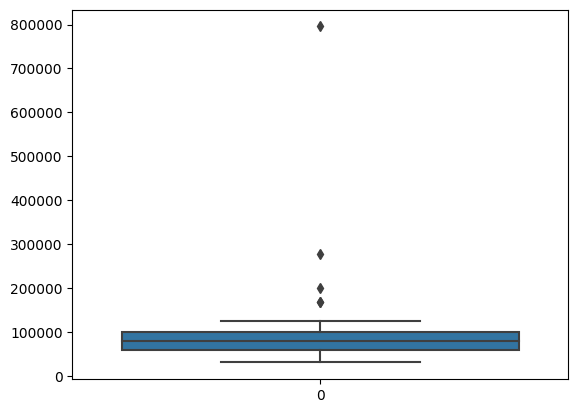

In [125]:
import seaborn as sns
sns.boxplot(merged_data['TOTAL_SALES'])

In [126]:
percentile25 = merged_data['TOTAL_SALES_SCALED'].quantile(0.25)
percentile75 = merged_data['TOTAL_SALES_SCALED'].quantile(0.75)
iqr=percentile75-percentile25

In [127]:
upper_limit

17.22998146322843

In [128]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [130]:
merged_data[merged_data['TOTAL_SALES_SCALED']>upper_limit]


,Unnamed: 0,CALENDAR_DT,STD_SALES,DIG_SALES,TOTAL_SALES,Demons Souls: (United States),playstation 5 buy online: (United States),ps5 buy online: (United States),sony ps5 buy online: (United States),Destruction AllStars: (United States),Returnal: (United States),Ratchet & Clank: Rift Apart: (United States),Forspoken: (United States),TOTAL_SALES_MA,PlayStation_MA,TOTAL_SALES_SCALED,ps_5_MA,Forspoken_MA,Ratchet_MA
27,27,2022-11-13,136547,32508,169055,30,28,29,0,16,46,48,19,15.279110,34.00,18.096883,26.666667,20.0,41.0
28,28,2022-11-20,155414,45043,200457,49,33,83,27,26,63,72,18,20.149392,45.00,22.201902,45.333333,18.5,60.0
29,29,2022-11-27,230619,45851,276470,41,61,65,0,30,52,55,17,27.170293,52.25,32.138683,59.000000,17.5,63.5
30,30,2022-12-18,144607,24734,169341,57,41,76,0,70,62,60,50,25.136477,58.75,18.134270,74.666667,33.5,57.5
31,31,2022-12-25,674410,121176,795586,81,22,100,0,48,62,75,51,59.067135,65.50,100.000000,80.333333,50.5,67.5


In [131]:
merged_data=merged_data[merged_data['TOTAL_SALES']<795586]

In [132]:
merged_data

,Unnamed: 0,CALENDAR_DT,STD_SALES,DIG_SALES,TOTAL_SALES,Demons Souls: (United States),playstation 5 buy online: (United States),ps5 buy online: (United States),sony ps5 buy online: (United States),Destruction AllStars: (United States),Returnal: (United States),Ratchet & Clank: Rift Apart: (United States),Forspoken: (United States),TOTAL_SALES_MA,PlayStation_MA,TOTAL_SALES_SCALED,ps_5_MA,Forspoken_MA,Ratchet_MA
0,0,2022-01-16,85608,8890,94498,100,0,51,46,71,87,65,12,NaN,NaN,8.350436,NaN,NaN,NaN
1,1,2022-01-23,76414,10207,86621,91,0,45,0,70,71,58,10,7.835577,NaN,7.320718,NaN,11.0,61.5
2,2,2022-01-30,83445,9325,92770,78,19,30,0,50,63,56,10,7.722631,NaN,8.124544,42.000000,10.0,57.0
3,3,2022-02-13,39029,6210,45239,54,0,43,0,56,61,51,11,5.017805,57.50,1.911065,39.333333,10.5,53.5
4,4,2022-02-20,37089,6762,43851,70,45,42,0,47,42,45,12,1.820342,52.50,1.729619,38.333333,11.5,48.0
5,5,2022-02-27,48665,10774,59439,49,31,34,19,40,34,34,12,2.748488,46.50,3.767357,39.666667,12.0,39.5
6,6,2022-03-13,50087,13233,63320,44,0,57,0,52,46,33,25,4.021028,40.75,4.274700,44.333333,18.5,33.5
7,7,2022-03-20,36899,9371,46270,53,0,25,0,39,77,34,17,3.160271,36.50,2.045843,38.666667,21.0,33.5
8,8,2022-03-27,54367,7824,62191,46,42,27,18,17,62,36,18,3.086477,34.25,4.127112,36.333333,17.5,35.0
9,9,2022-04-17,33016,6393,39409,44,44,41,25,15,42,36,12,2.638026,34.75,1.148940,31.000000,15.0,36.0


## On stationary data, the time series data model operates. The three criteria listed below characterize the stationarity of data:

### The mean ought to remain constant.
###  Its variance ought to be constant.
###  Time has no bearing on auto covariance.

# Plotting the graph


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


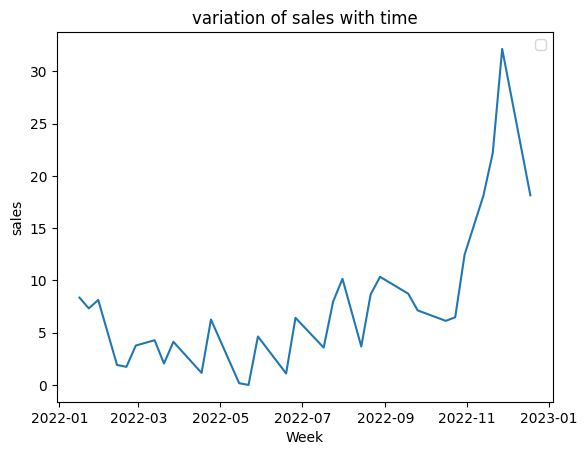

In [133]:
plt.plot(merged_data['CALENDAR_DT'],merged_data['TOTAL_SALES_SCALED'])
plt.title('variation of sales with time')
plt.xlabel('Week')
plt.ylabel('sales')
plt.legend()
plt.show()

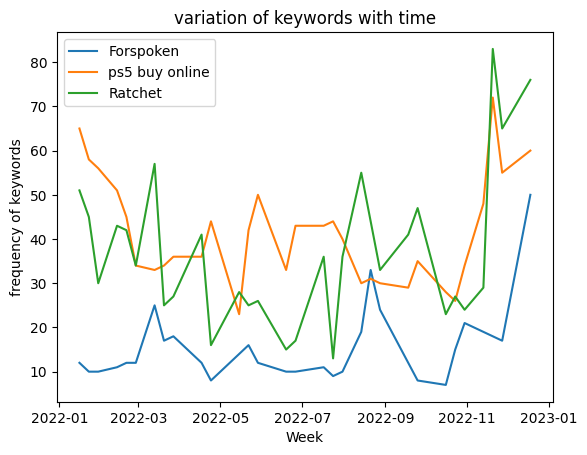

In [134]:
fig, ax = plt.subplots()
plt.plot(merged_data['CALENDAR_DT'],merged_data['Forspoken: (United States)'])
plt.plot(merged_data['CALENDAR_DT'],merged_data['Ratchet & Clank: Rift Apart: (United States)'])
plt.plot(merged_data['CALENDAR_DT'],merged_data['ps5 buy online: (United States)'])
plt.title('variation of keywords with time')
plt.xlabel('Week')

plt.ylabel('frequency of keywords')
ax.legend(['Forspoken','ps5 buy online','Ratchet'])
plt.show()

# Rolling Statistic Test

In [59]:
data1=merged_data[['CALENDAR_DT','TOTAL_SALES_SCALED']]

In [72]:
data1

,CALENDAR_DT,TOTAL_SALES_SCALED
0,2022-01-16,8.350436
1,2022-01-23,7.320718
2,2022-01-30,8.124544
3,2022-02-13,1.911065
4,2022-02-20,1.729619
5,2022-02-27,3.767357
6,2022-03-13,4.274700
7,2022-03-20,2.045843
8,2022-03-27,4.127112
9,2022-04-17,1.148940


In [135]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=4).mean() 
    rolstd = pd.Series(timeseries).rolling(window=4).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

In [136]:
y=merged_data['TOTAL_SALES_SCALED']
x=merged_data['Forspoken: (United States)']
z=merged_data['Ratchet & Clank: Rift Apart: (United States)']
m=merged_data['ps5 buy online: (United States)']

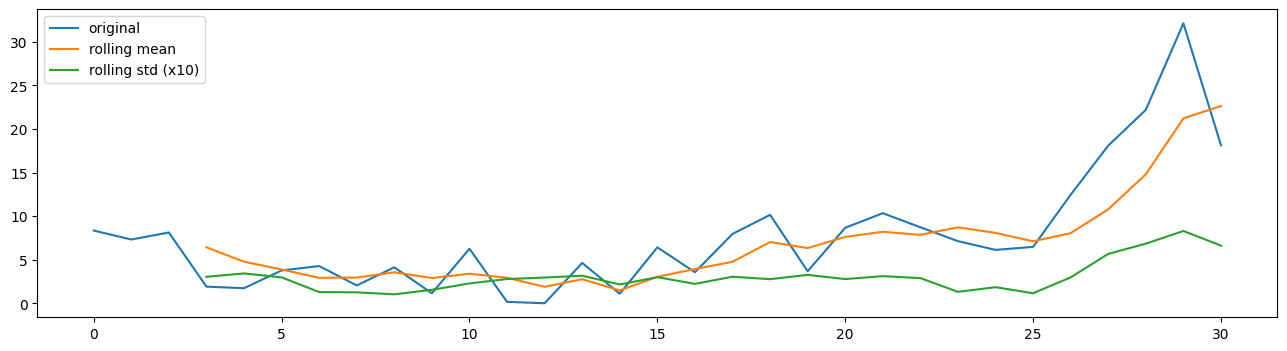

In [137]:
test_stationarity(y,'original') #total_sales_scaled

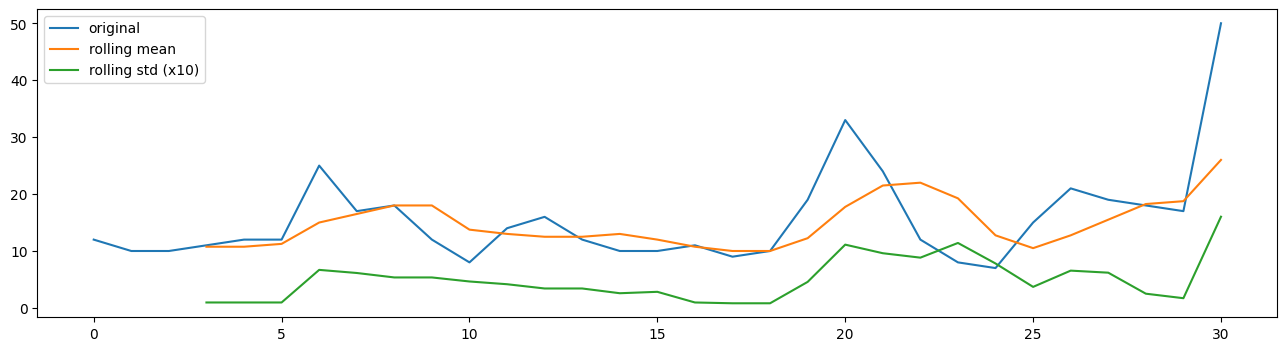

In [138]:
test_stationarity(x,'original') #Forspoken

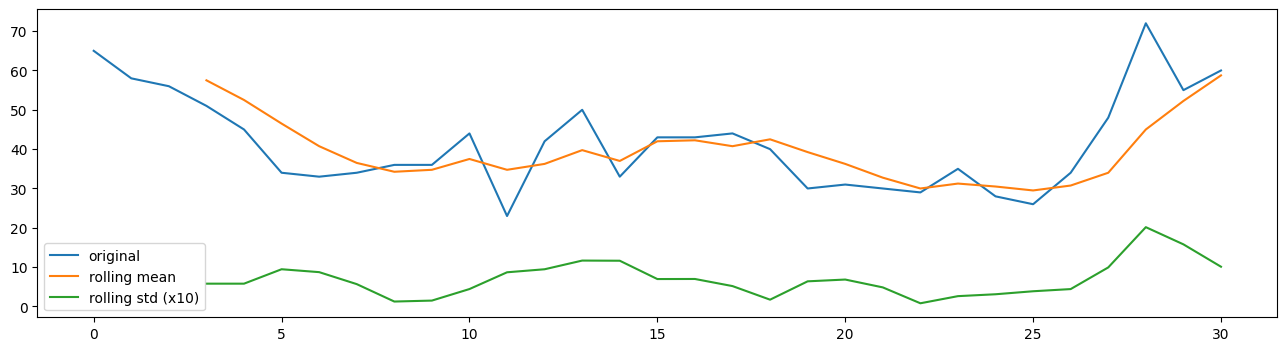

In [139]:
test_stationarity(z,'original') #Ratchet

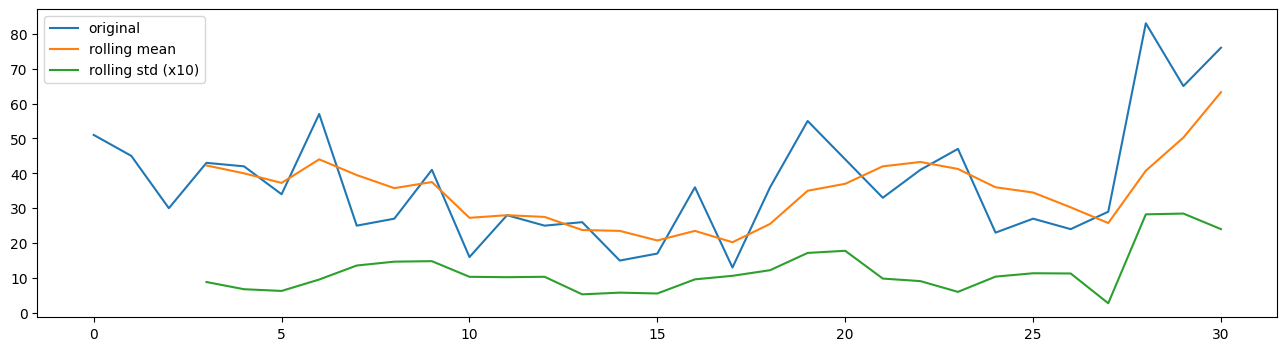

In [140]:
test_stationarity(m,'original') #ps5buyonline

## both the rolling mean and std does not change much over time. The data is likely stationary

## Augmented Dickey Fuller test

In [149]:
from statsmodels.tsa.stattools import adfuller
def ADF_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [150]:
ADF_test(merged_data['TOTAL_SALES'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.629555
p-value                         0.467724
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [144]:
ADF_test(merged_data['ps5 buy online: (United States)'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.923721
p-value                         0.042658
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [145]:
ADF_test(merged_data['Forspoken: (United States)'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.955748
p-value                         0.306306
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [146]:
ADF_test(merged_data['Ratchet & Clank: Rift Apart: (United States)'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.695510
p-value                         0.074818
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
